In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv("position_salary 1.csv")
df

,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,NaN,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404
...,...,...,...,...,...,...
3462,Salesforce developer,Hyderabad,Male,B.Tech/B.E.,21,816277
3463,Salesforce developer,Bengaluru,Male,BCA,20,1786298
3464,Salesforce developer,New Delhi,Female,NaN,28,1050400
3465,Salesforce developer,Gurugram,Male,B.A,25,764525


In [25]:
# Check for Missing or Invalid Values
print(df.describe())
print(df.isnull().sum())

       Experience (Years)        Salary
count         3467.000000  3.467000e+03
mean            16.639746  1.487459e+06
std              6.935259  5.776934e+05
min              5.000000  5.026890e+05
25%             11.000000  9.818155e+05
50%             17.000000  1.475343e+06
75%             23.000000  1.985568e+06
max             28.000000  2.499925e+06
Position              19
Location               0
Gender                24
Education             76
Experience (Years)     0
Salary                 0
dtype: int64


In [27]:
# Drop non-numeric or identifier columns if needed
df_cleaned = df.select_dtypes(include=['float64', 'int64'])

In [29]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [31]:
# Apply PCA
pca = PCA(n_components=2)  # reduce to 2 components for visualization
pca_components = pca.fit_transform(scaled_data)

In [33]:
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

In [35]:
# Optional: Add salary back for coloring
if 'Salary' in df.columns:
    pca_df['Salary'] = df['Salary']

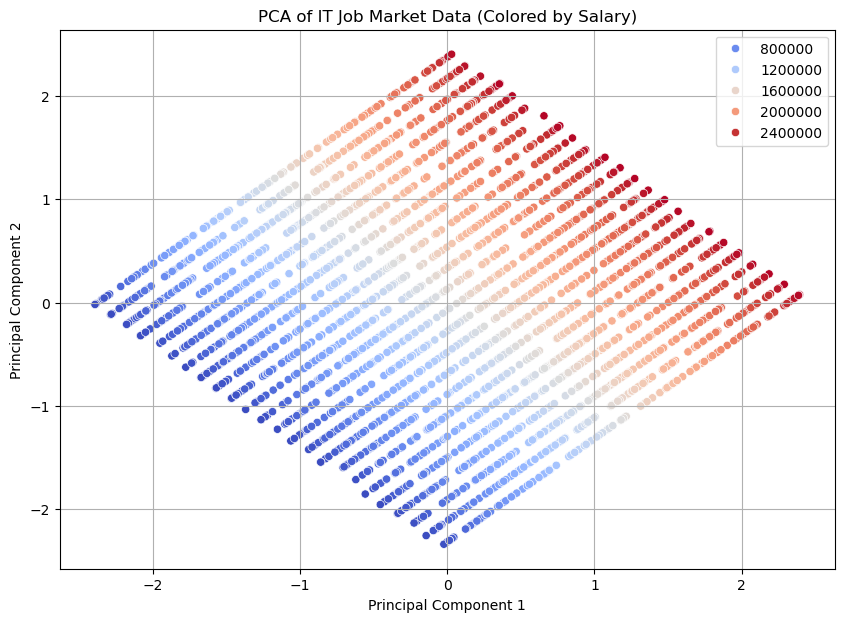

In [43]:
# Plot PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Salary', palette='coolwarm')
plt.title('PCA of IT Job Market Data (Colored by Salary)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()